Step1/2:

Downloaded the dataset and prep'd it

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import seaborn as sns
scaler = StandardScaler()
# Ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
adm= pd.read_csv('Admission_Predict_Ver1.1.csv')
adm

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
adm=adm.replace(r'^\s*$', np.nan, regex=True)
adm.dropna(inplace=True,axis=0)
adm

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


Step 3:

Its a Supervised Learning Problem because we have a Y(Chance of Admit), It's Regression Since its a value not a category and as for the rest its below

In [4]:
X = adm.drop('Serial No.', axis = 1)
X = X.drop('Chance of Admit ', axis = 1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


Looks Mostly Linear to me

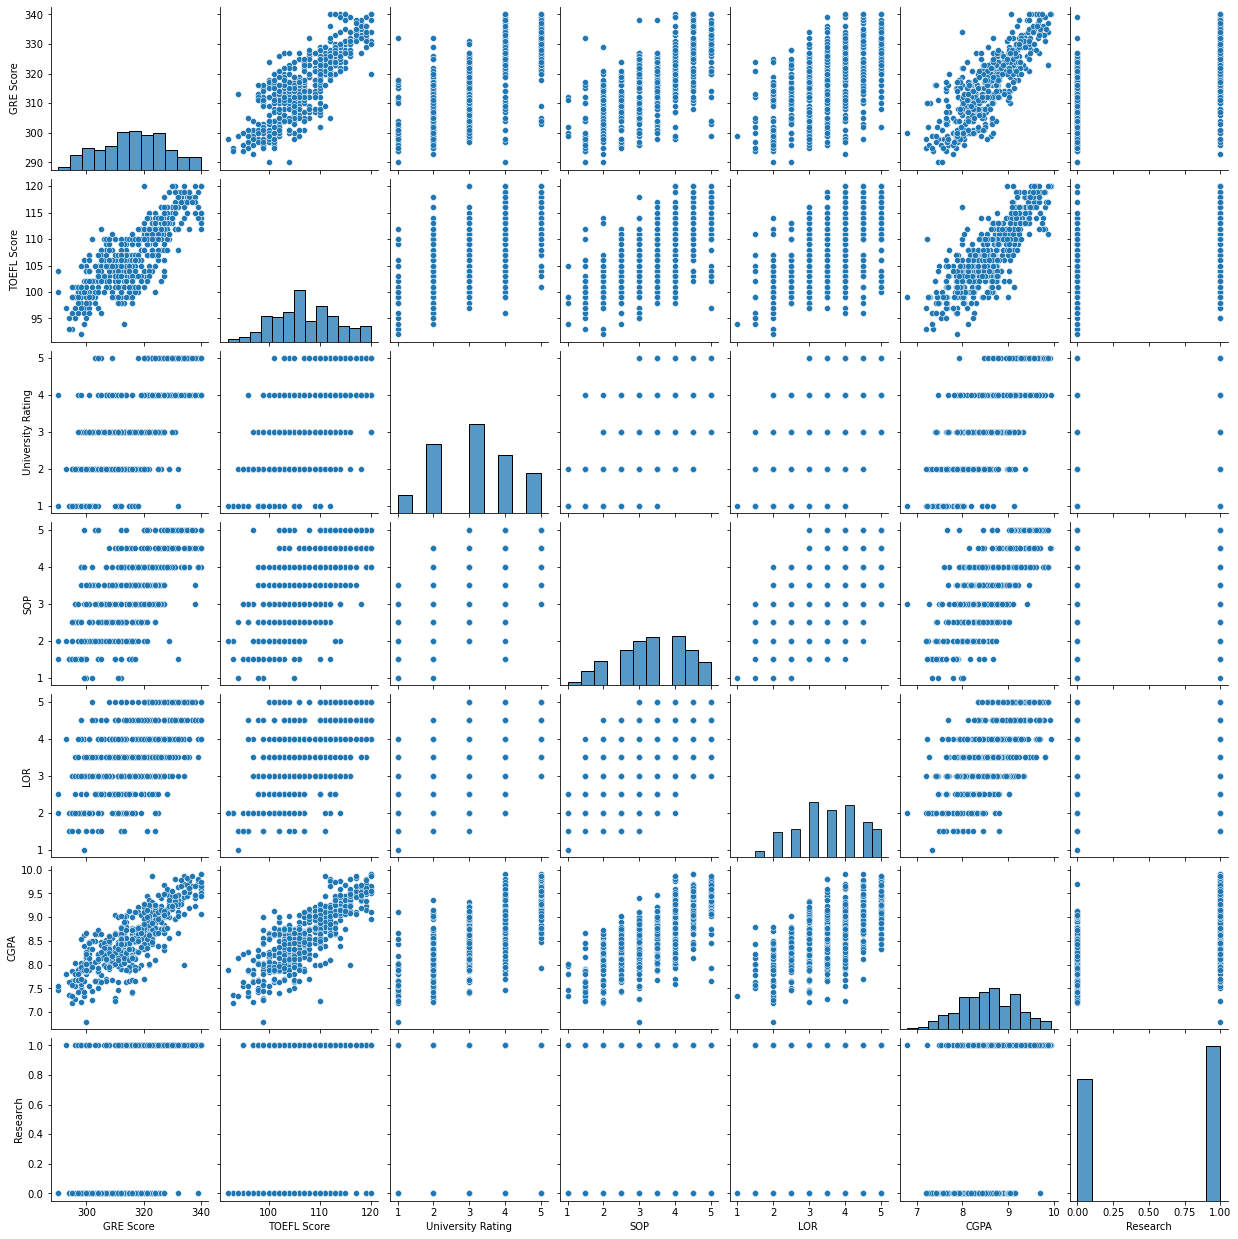

In [5]:
sns.pairplot(X)

I mean in theory Linear Regression would work, SVR would work since its a low count dataset with not too many issues and I suppose while im at it I could try an ANN

Step 4:

I already split up X but I process it below along with y

In [6]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [7]:
scal_feat = X.copy()
col_names = ['GRE Score','TOEFL Score','SOP','LOR ','CGPA']
feat = scal_feat[col_names]
feat = scaler.fit_transform(feat.values)
scal_feat[col_names] = feat
Xscal = scal_feat
Xscal

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,4,1.137360,1.098944,1.776806,1
1,0.667148,-0.031601,4,0.632315,1.098944,0.485859,1
2,-0.041830,-0.525364,3,-0.377773,0.017306,-0.954043,1
3,0.489904,0.462163,3,0.127271,-1.064332,0.154847,1
4,-0.219074,-0.689952,2,-1.387862,-0.523513,-0.606480,0
...,...,...,...,...,...,...,...
495,1.376126,0.132987,5,1.137360,0.558125,0.734118,1
496,1.819238,1.614278,5,1.642404,1.639763,2.140919,1
497,1.198882,2.108041,5,1.137360,1.639763,1.627851,1
498,-0.396319,-0.689952,4,0.632315,1.639763,-0.242367,0


In [8]:
y = adm['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(Xscal, y, test_size = 0.2, random_state = 0)

In [10]:
print(x_train,x_test)

     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
107   1.907860     1.614278                  4  0.127271  1.098944  1.462345   
336   0.224037     0.462163                  3 -0.377773 -1.064332  0.353455   
71    1.730615     0.791338                  5  1.642404  1.639763  1.958863   
474  -0.750808    -0.360777                  4 -0.377773 -1.064332 -1.036796   
6     0.401282     0.297575                  3 -0.377773  0.558125 -0.623031   
..         ...          ...                ...       ...       ...       ...   
323  -1.016674    -0.854540                  2 -1.387862 -1.064332 -0.656132   
192   0.489904     1.120514                  5  1.137360  0.558125  0.601714   
117  -2.346008    -0.525364                  4 -1.387862 -1.064332 -1.847775   
47    1.996482     1.943453                  5  1.137360  0.558125  1.859559   
172   0.489904     0.462163                  4  0.632315  1.639763  0.916175   

     Research  
107         1  
336    

In [11]:
def line(): 
    model = LinearRegression()
    model.fit(x_train, y_train)
    score = model.score(x_test,y_test)
    print(score)
    return
line()

0.7664048993199384


In [12]:
def SV():   
    reg = SVR()
    reg.fit(x_train, y_train)
    score = reg.score(x_test,y_test)
    return score
SV()

0.7059038867649909

In [13]:
def ANN():
    model = MLPRegressor(hidden_layer_sizes=(25,25,25), activation='relu',
                         solver='adam', batch_size=20, max_iter=100, random_state=0)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    return score
ANN()

0.7100723349915177

With just default parameters, it seems that linear regression was so far the best option I could of picked, mind you for the ANN I kind of HAD to put in some of the values but im surprised how poorly they worked with default values

Step 7:

Theres not much I can really change for linear regression, I managed to bump up SVR by a solid 3% so that was nice, but still kind of far from base Linear, and the ANN was actually running for far too long so I turned it down a bit and adjusted some values and actually got a 3% increase as well, but still not enough to match Linear

In [29]:
def line2(): 
    model = LinearRegression()
    model.fit(x_train, y_train)
    score = model.score(x_test,y_test)
    print(score)
    return
line2()

0.7664048993199384


In [15]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf','linear']} 

In [17]:
grid = GridSearchCV(SVR(), param_grid, verbose=2, refit = True)

In [18]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   2.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.9s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [19]:
print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1000, 'gamma': 1, 'kernel': 'linear'} with a score of 0.79


In [28]:
def SV2():   
    reg = SVR(C=1000, gamma=1,kernel='linear')
    reg.fit(x_train, y_train)
    score = reg.score(x_test,y_test)
    return score
SV2()

0.7344477656351612

In [44]:
def ANN2():
    model = MLPRegressor(hidden_layer_sizes=(40,40), activation='relu',
                         solver='adam', batch_size=30, max_iter=30, random_state=0)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    return score
ANN2()

0.7439426568227919